In [27]:
import pandas as pd

# Load the CSV file (replace with the actual path if saved locally)
df = pd.read_csv('../data/raw_analyst_ratings.csv')

# Display the first few rows
df.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


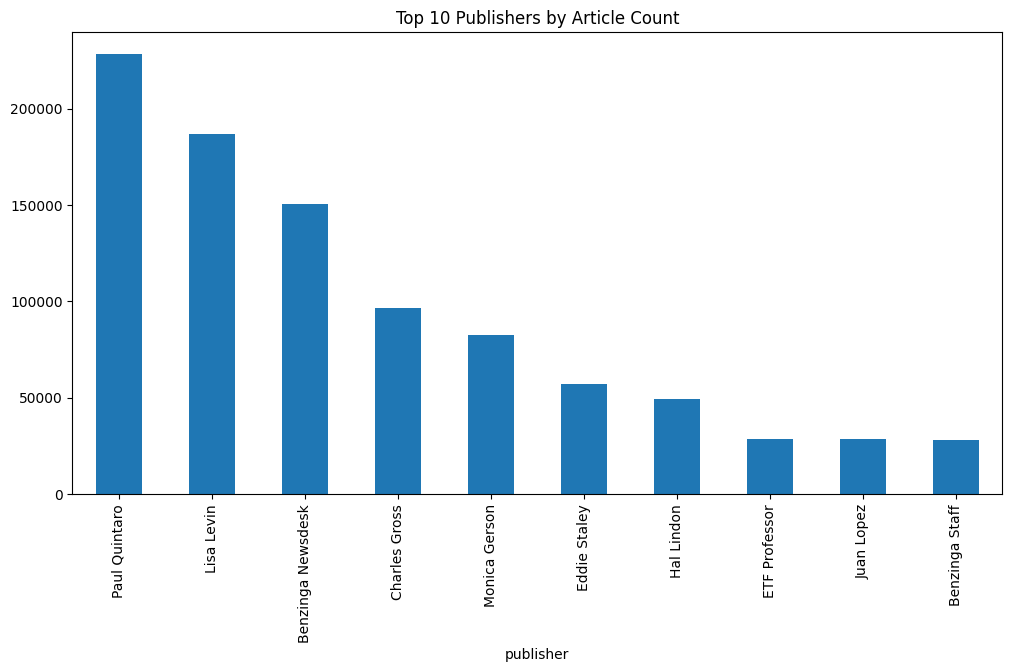

In [28]:





# Headline length
df['headline_length'] = df['headline'].str.len()

# Basic stats on headline length
print(df['headline_length'].describe())

# Articles count per publisher
publisher_counts = df['publisher'].value_counts()
print(publisher_counts.head(10))

# Plot top 10 publishers
publisher_counts.head(10).plot(kind='bar', figsize=(12,6), title='Top 10 Publishers by Article Count')
plt.show()


In [29]:
# Example: headline length in characters
df['headline_length'] = df['headline'].str.len()

# Basic stats
print(df['headline_length'].describe())


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [30]:
publisher_counts = df['publisher'].value_counts()
print(publisher_counts.head(10))  # Top 10 publishers by article count


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


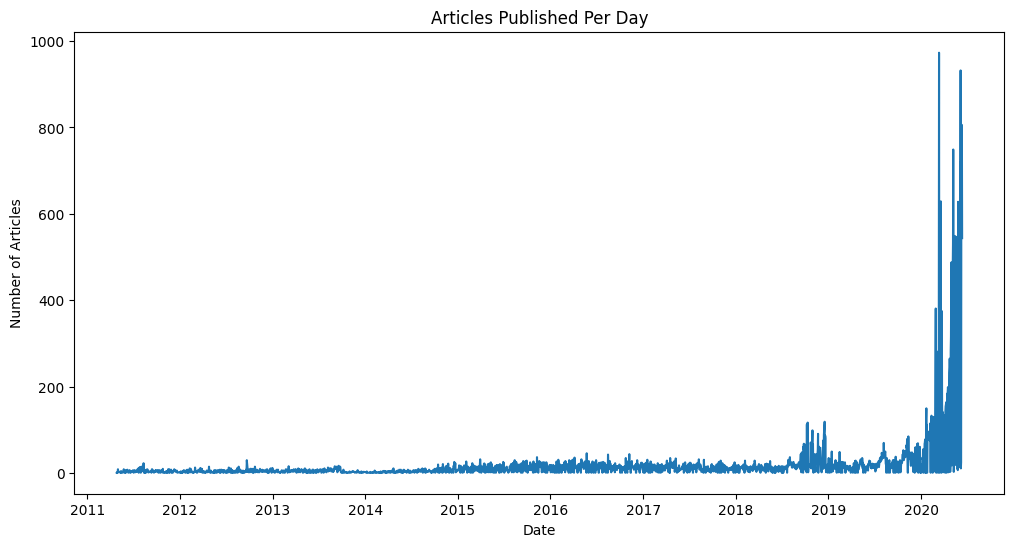

In [31]:
# Group by date (day)
# Make sure 'date' column is datetime type
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Now you can use the .dt accessor safely
articles_per_day = df.groupby(df['date'].dt.date).size()


import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
articles_per_day.plot()
plt.title('Articles Published Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()


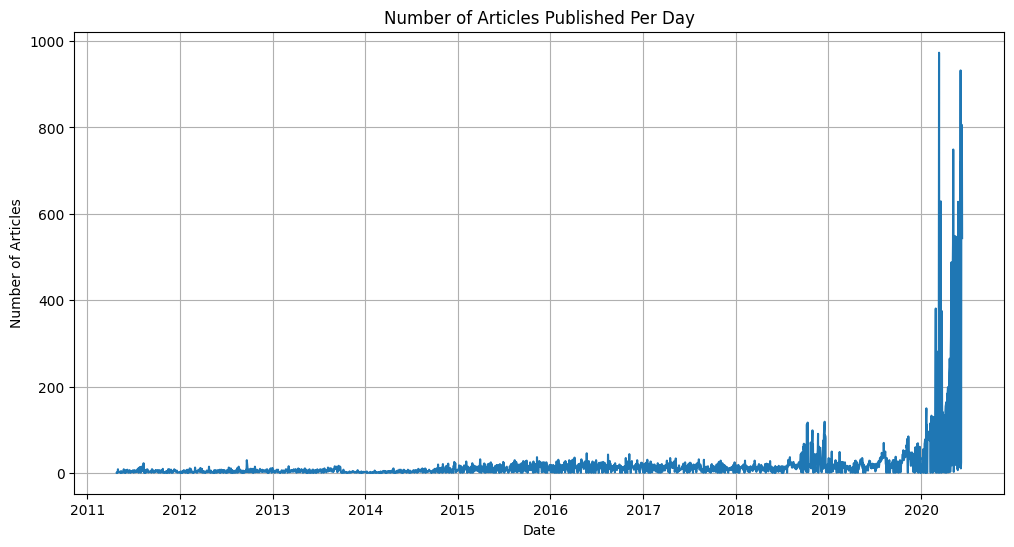

In [32]:
import matplotlib.pyplot as plt

# Group by date and count articles per day
articles_per_day = df.groupby(df['date'].dt.date).size()

# Plot
plt.figure(figsize=(12,6))
articles_per_day.plot(kind='line')
plt.title('Number of Articles Published Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


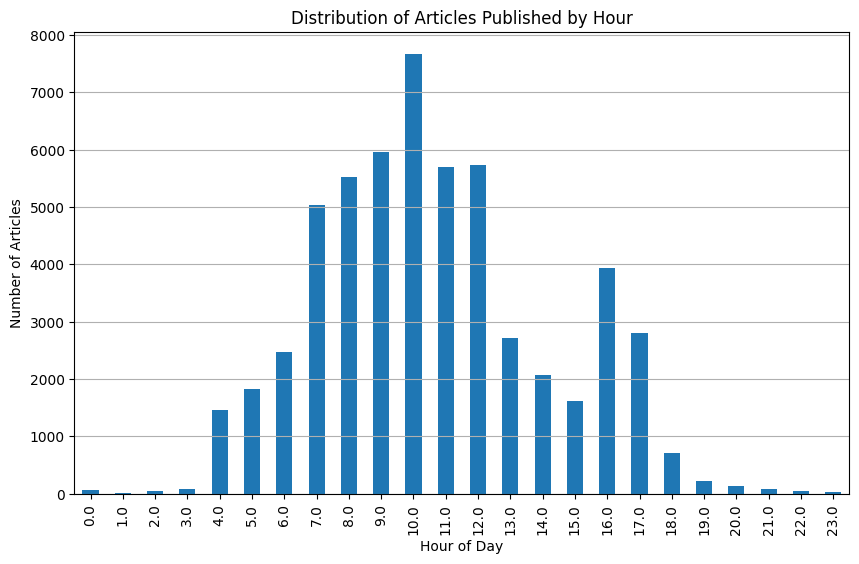

In [38]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['publish_hour'] = df['date'].dt.hour


plt.figure(figsize=(10, 6))
df['publish_hour'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Articles')
plt.title('Distribution of Articles Published by Hour')
plt.grid(axis='y')
plt.show()





publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


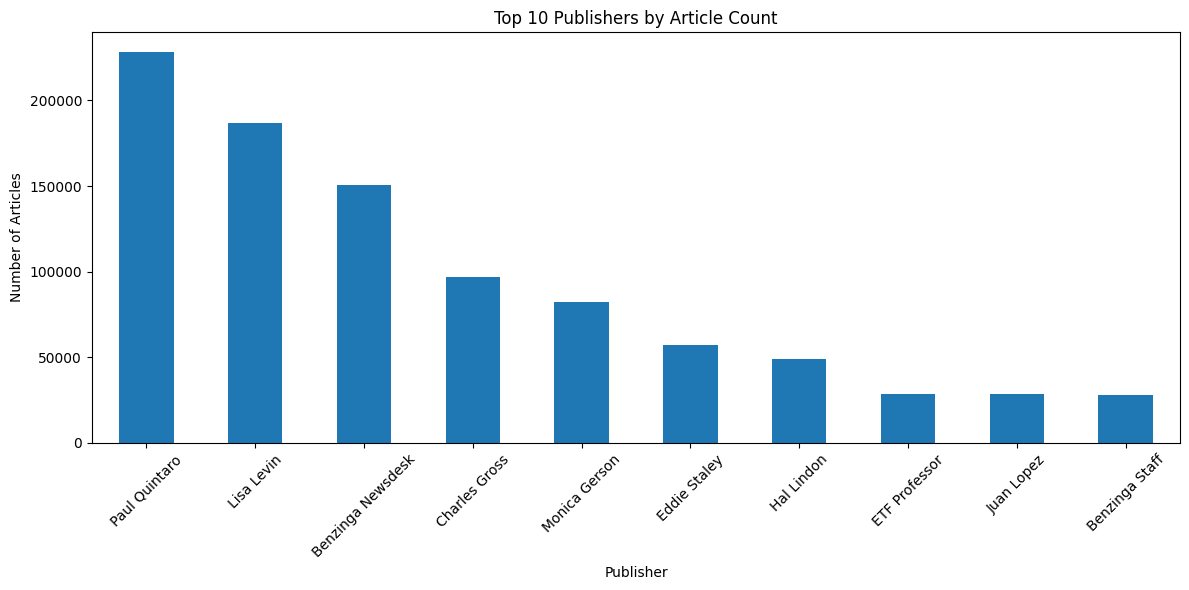

In [41]:
publisher_counts = df['publisher'].value_counts()

# Display the top 10 publishers
top_publishers = publisher_counts.head(10)
print(top_publishers)

# Plot
plt.figure(figsize=(12, 6))
top_publishers.plot(kind='bar')
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
# Count articles per publisher (entire dataset)
publisher_counts = df['publisher'].value_counts()

# Display top 10
print("Top 10 publishers:")
print(publisher_counts.head(10))


Top 10 publishers:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


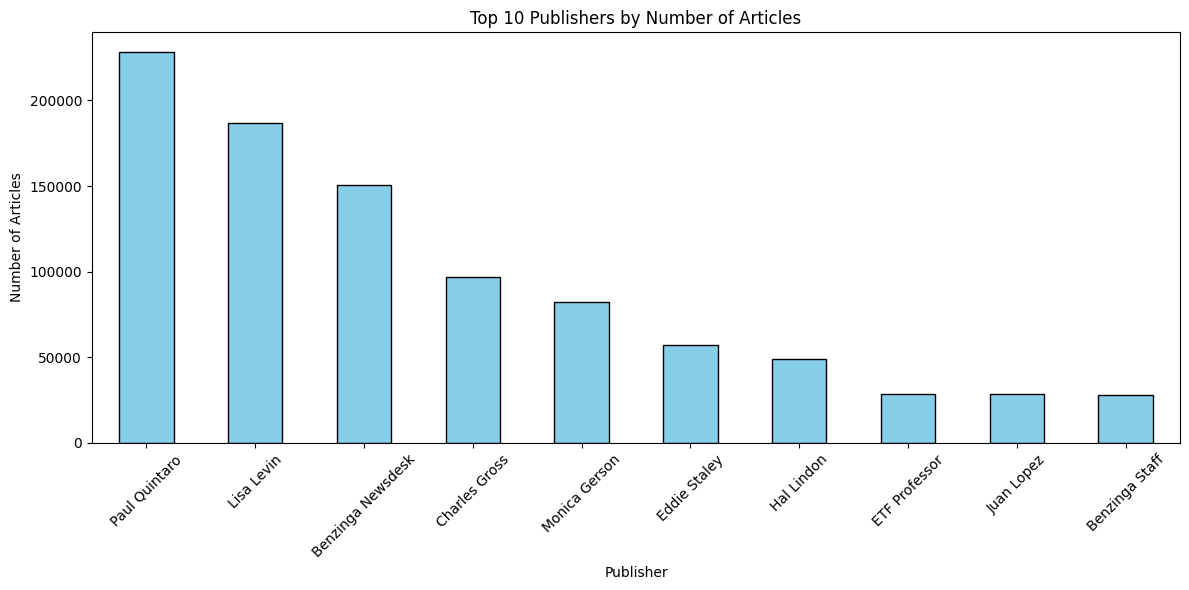

In [43]:
top_publishers = publisher_counts.head(10)

plt.figure(figsize=(12, 6))
top_publishers.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Publishers by Number of Articles')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [45]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import string

nltk.download('stopwords')
from nltk.corpus import stopwords

# Clean headlines
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return ' '.join(tokens)

# Apply to headlines
df['cleaned_headline'] = df['headline'].astype(str).apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bezat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


KeyboardInterrupt: 

In [46]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Download stopwords if needed
nltk.download('stopwords')

# Prepare headlines
headlines = df['headline'].dropna().tolist()

# Vectorize headlines (remove stopwords)
stop_words = stopwords.words('english')
vectorizer = CountVectorizer(stop_words=stop_words, max_df=0.95, min_df=2)
dtm = vectorizer.fit_transform(headlines)

# Fit LDA model - let's say 5 topics
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Show top words per topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, vectorizer.get_feature_names_out(), 10)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bezat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


KeyboardInterrupt: 

In [47]:
# Average headline length per publisher
avg_length = df.groupby('publisher')['headline_length'].mean().sort_values(ascending=False)
print("Average headline length per publisher:")
print(avg_length)

# Article counts per publisher (already done but printed nicely)
article_counts = df['publisher'].value_counts()
print("\nArticle counts per publisher:")
print(article_counts)


Average headline length per publisher:
publisher
Benzinga Newsdesk     228.241899
Benzinga  Newsdesk    158.268945
Brad Hammond          157.949234
MicroCapital          141.520000
Luke J Jacobi         135.762994
                         ...    
Rodney Ohebsion        16.000000
AlphaClone             15.444444
Sophie Reynolds        13.000000
BuyAndHoldPlus         13.000000
Economic Burn           5.000000
Name: headline_length, Length: 1034, dtype: float64

Article counts per publisher:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


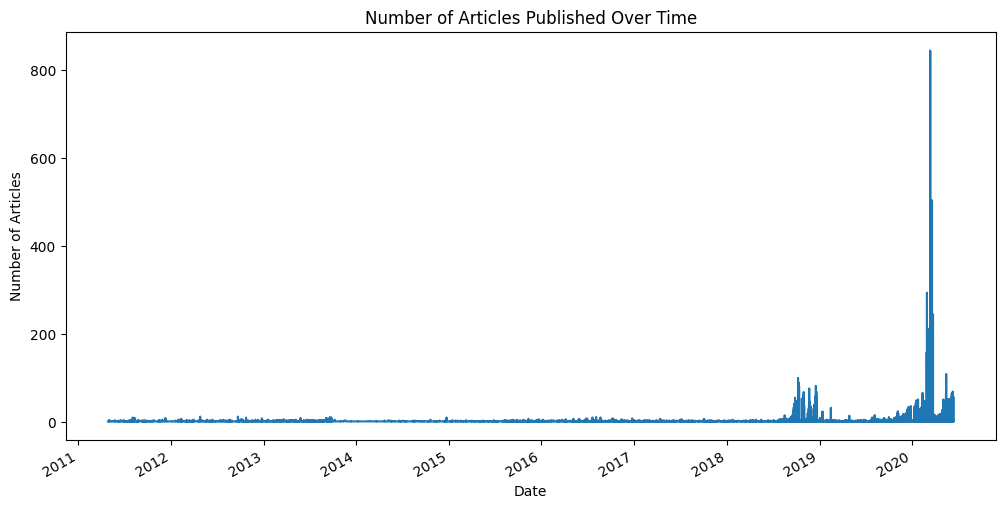

In [48]:


plt.figure(figsize=(12,6))
df['date'].value_counts().sort_index().plot()
plt.title('Number of Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()
